In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
ClientCountRaw = pd.read_csv("/Users/michelle/Downloads/result.csv")
RawFiles = pd.read_csv("/Users/michelle/Documents/dining_data.csv")
Key = pd.read_csv("/Users/michelle/Downloads/key.csv")

In [2]:
filter1 = ClientCountRaw.crowd_id.isnull()
client_count_max =  ClientCountRaw[~filter1][["crowd_id", "crowd_max", ]]

In [3]:
all_files = pd.merge(RawFiles, client_count_max, how = "left", left_on = "dining_hall_id", right_on = "crowd_id")
all_files = all_files.dropna(0, "any")
all_files = all_files.assign(capacity_percentage=lambda y: y.client_count / y.crowd_max * 100 )


In [4]:
all_files

,time_stamp,dining_hall_id,client_count,crowd_id,crowd_max,capacity_percentage
0,1633785276,155,1,155.0,246.0,0.406504
1,1633785276,155,1,155.0,246.0,0.406504
2,1633785276,192,2,192.0,104.0,1.923077
20,1633785276,104,20,104.0,264.0,7.575758
32,1633785399,155,1,155.0,246.0,0.406504
...,...,...,...,...,...,...
5236,1633817152,104,62,104.0,264.0,23.484848
5248,1633817275,155,5,155.0,246.0,2.032520
5249,1633817275,155,5,155.0,246.0,2.032520
5250,1633817275,192,2,192.0,104.0,1.923077


In [5]:

Filter1 = all_files.dining_hall_id == 155
JohnJay = all_files[Filter1][["time_stamp", "capacity_percentage"]]
JJ = all_files[all_files.dining_hall_id == 192][["time_stamp", "capacity_percentage"]]
Lerner = all_files[all_files.dining_hall_id == 104][["time_stamp", "capacity_percentage"]]
JohnJay

,time_stamp,capacity_percentage
0,1633785276,0.406504
1,1633785276,0.406504
32,1633785399,0.406504
33,1633785399,0.406504
64,1633785521,0.406504
...,...,...
5185,1633817031,2.032520
5216,1633817152,2.032520
5217,1633817152,2.032520
5248,1633817275,2.032520


In [6]:
Lerner

,time_stamp,capacity_percentage
20,1633785276,7.575758
52,1633785399,7.575758
84,1633785521,7.575758
116,1633785643,7.575758
148,1633785765,7.575758
...,...,...
5140,1633816788,24.242424
5172,1633816909,24.242424
5204,1633817031,23.484848
5236,1633817152,23.484848


In [7]:
# Extracting columns and converting timestampss
JohnJay['time_stamp'] = pd.to_datetime(JohnJay['time_stamp'], unit='ms')
JJ['time_stamp'] = pd.to_datetime(JJ['time_stamp'], unit='ms')
Lerner['time_stamp'] = pd.to_datetime(Lerner['time_stamp'], unit='ms')

# datetime.datetime.fromtimestamp(dates)

In [8]:
JJ

,time_stamp,capacity_percentage
2,1970-01-19 21:49:45.276,1.923077
34,1970-01-19 21:49:45.399,1.923077
66,1970-01-19 21:49:45.521,1.923077
98,1970-01-19 21:49:45.643,1.923077
130,1970-01-19 21:49:45.765,1.923077
...,...,...
5122,1970-01-19 21:50:16.788,1.923077
5154,1970-01-19 21:50:16.909,1.923077
5186,1970-01-19 21:50:17.031,1.923077
5218,1970-01-19 21:50:17.152,1.923077


In [9]:
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [10]:
#fixing the random seed for reproducibility
np.random.seed(7)

In [11]:
#loading the dataset; changing values into float32
johnjay_dataset = JohnJay["capacity_percentage"].values.astype('float32').reshape(-1, 1)
johnjay_dataset

array([[0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [0.40650406],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [3.2520325 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.2195122 ],
       [1.219

In [23]:
#normalizing the dataset
scaler = MinMaxScaler(feature_range= (0, 1))
johnjay_dataset = scaler.fit_transform(johnjay_dataset)

In [13]:
#split data into train and test sets
train_size = int(len(johnjay_dataset) * 0.67)
test_size = len(johnjay_dataset) - train_size
train, test = johnjay_dataset[0:train_size,:], johnjay_dataset[train_size:len(johnjay_dataset),:]
print(len(train), len(test))

221 109


In [14]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range (len(dataset) - look_back -1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [15]:
create_dataset(johnjay_dataset)

(array([[0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [0.40650406],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [3.2520325 ],
        [1.2195122 ],
        [1.2195122 ],
        [1.2195122 ],
        [1.2195122 ],
        [1.2195122 ],
        [1.2195122 ],
        [1.2195122 ],
        [1

In [16]:
#reshape into X = t and Y = t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
219/219 - 2s - loss: 3.0479
Epoch 2/100
219/219 - 0s - loss: 1.6616
Epoch 3/100
219/219 - 0s - loss: 0.8625
Epoch 4/100
219/219 - 0s - loss: 0.5146
Epoch 5/100
219/219 - 0s - loss: 0.3739
Epoch 6/100
219/219 - 0s - loss: 0.2927
Epoch 7/100
219/219 - 0s - loss: 0.2350
Epoch 8/100
219/219 - 0s - loss: 0.1940
Epoch 9/100
219/219 - 0s - loss: 0.1647
Epoch 10/100
219/219 - 0s - loss: 0.1459
Epoch 11/100
219/219 - 0s - loss: 0.1349
Epoch 12/100
219/219 - 0s - loss: 0.1269
Epoch 13/100
219/219 - 0s - loss: 0.1229
Epoch 14/100
219/219 - 0s - loss: 0.1191
Epoch 15/100
219/219 - 0s - loss: 0.1169
Epoch 16/100
219/219 - 0s - loss: 0.1157
Epoch 17/100
219/219 - 0s - loss: 0.1146
Epoch 18/100
219/219 - 0s - loss: 0.1141
Epoch 19/100
219/219 - 0s - loss: 0.1129
Epoch 20/100
219/219 - 0s - loss: 0.1123
Epoch 21/100
219/219 - 0s - loss: 0.1117
Epoch 22/100
219/219 - 0s - loss: 0.1114
Epoch 23/100
219/219 - 0s - loss: 0.1107
Epoch 24/100
219/219 - 0s - loss: 0.1111
Epoch 25/100
219/219 - 0s

In [24]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.33 RMSE
Test Score: 0.26 RMSE


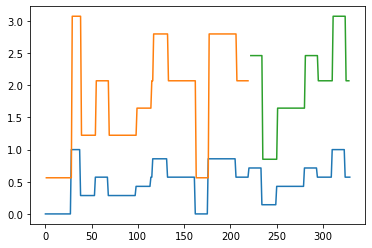

In [29]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(johnjay_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(johnjay_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(johnjay_dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(johnjay_dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()